## Introduction

We'd like to visualize some DEM data from Mt St Helens. [See this blog post by Evan Bianco.](http://www.agilegeoscience.com/journal/2014/5/6/how-much-rock-was-erupted-from-mt-st-helens.html)

In [1]:
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/d/dc/MSH82_st_helens_plume_from_harrys_ridge_05-19-82.jpg'
Image(url=url, width=400)

## Import libraries and data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
before = np.loadtxt('data/st-helens_before.txt')
after = np.loadtxt('data/st-helens_after.txt')

In [4]:
after

array([[-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       ...,
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.],
       [-32767., -32767., -32767., ..., -32767., -32767., -32767.]])

Those weird values are NaNs. They will cause trouble, but we will deal.

In [5]:
after.shape

(1400, 979)

In [7]:
np.ptp(after)

np.float64(41134.0)

In [8]:
print(np.amin(before), np.amax(before))
print(np.amin(after), np.amax(after))

-32767.0 2951.0
-32767.0 8367.0


## Plotting and cleaning data

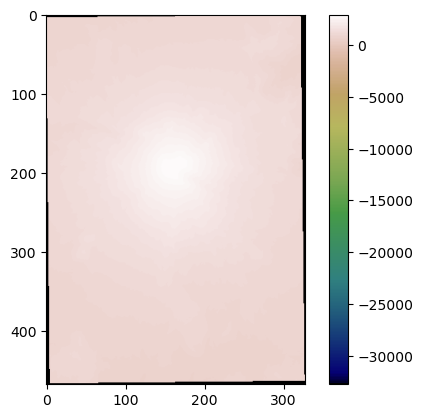

In [9]:
plt.imshow(before, cmap="gist_earth")
plt.colorbar()
plt.show()

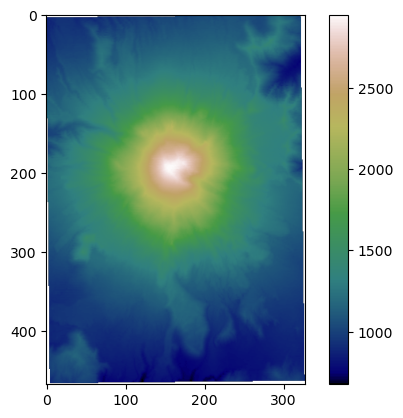

In [10]:
before[before==-32767.] = np.nan
after[after==-32767.] = np.nan

plt.imshow(before, cmap="gist_earth")
plt.colorbar()
plt.show()

In [11]:
print(np.amin(before), np.amax(before))
print(np.amin(after), np.amax(after))

nan nan
nan nan


In [12]:
print(np.nanmin(before), np.nanmax(before))
print(np.nanmin(after), np.nanmax(after))

676.0 2951.0
2231.0 8367.0


Seems like <code>before</code> is in metres, while <code>after</code> is in feet. Of course.

## 3D plotting in matplotlib

In [13]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

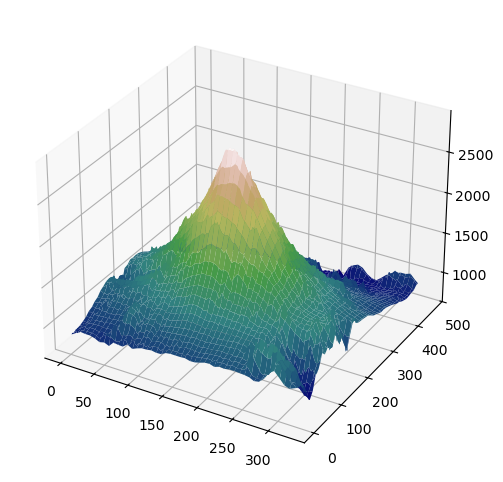

In [14]:
x = np.arange(before.shape[1])
y = np.arange(before.shape[0])
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(x, y, before, cmap="gist_earth", linewidth=0, vmin=676, vmax=2951)

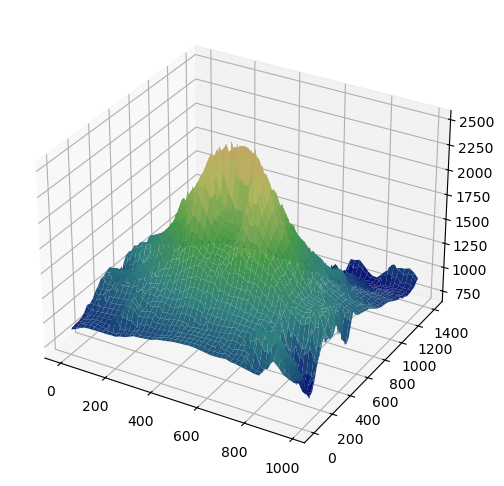

In [15]:
after /= 3.28084 # convert to metres
x = np.arange(after.shape[1])
y = np.arange(after.shape[0])
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(x, y, after, cmap="gist_earth", linewidth=0, vmin=676, vmax=2951)

In [16]:
print(before.shape, after.shape)

(468, 327) (1400, 979)


The grids are different sizes. We need to resample.

## Resampling

In [17]:
import scipy.ndimage
before_re = scipy.ndimage.zoom(before, 3, order=0)
print(before_re.shape)

(1404, 981)


Remove 2 elements from top and bottom of first dimension, and 1 element from second

In [18]:
before_re = before_re[2:-2,1:-1]
print(before_re.shape)

after_re = after
print(after_re.shape)

(1400, 979)
(1400, 979)


The "after" data remains unchanged

Now this matches the shape of the "after" array, so we can do math on them

In [19]:
difference = before_re - after_re

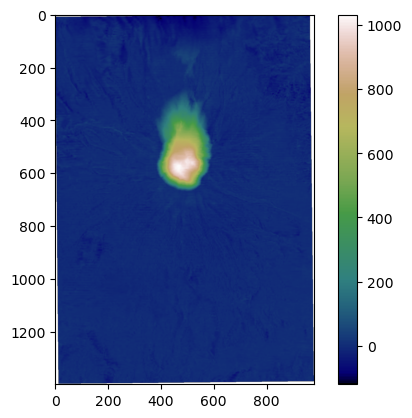

In [20]:
plt.imshow(difference, cmap='gist_earth')
plt.colorbar()
plt.show()

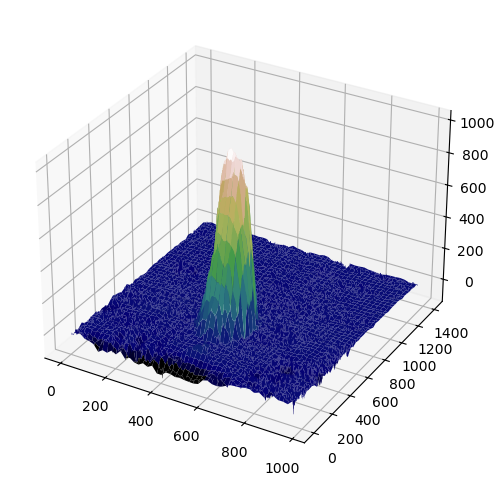

In [21]:
x = np.arange(difference.shape[1])
y = np.arange(difference.shape[0])
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x, y, difference, cmap="gist_earth", linewidth=0, vmin=-50, vmax=1000 )
plt.show()

In [22]:
volume = 100 * np.nansum(difference)
print("Approximate expelled volume: {0} m³ or {1:.3} km³".format(int(round(volume,-5)), volume/1e9))

Approximate expelled volume: 2004700000 m³ or 2.0 km³


## 3D views in Mayavi

Mayavi doesn't perform well in the notebook so it is omitted. Try it on your machine... [Installation instructions.](http://docs.enthought.com/mayavi/mayavi/installation.html)

Note that VTK is a prerequisite, and installing it can be a bit involved. 